In [1]:
import numpy as np 
from scipy.linalg import eigh   #返回复数Hermitian(共轭对称)或实对称矩阵的特征值和特征向量
import math
from matplotlib import pyplot as plt 
import time
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

In [2]:
num_elems=8
def beam(num_elems):
    restrained_dofs = [1, 0]
	#restrained_dofs = [1, 0, -2, -1]
    q=100
    l = 1.0 / num_elems
    Cm = 1.0   # rho.A
    Ck = 1.0   # E.I

	# element mass and stiffness matrices
    m = np.array([[156, 22*l, 54, -13*l],
				  [22*l, 4*l*l, 13*l, -3*l*l],
				  [54, 13*l, 156, -22*l],
				  [-13*l, -3*l*l, -22*l, 4*l*l]]) * Cm * l / 420

    k = np.array([[12, 6*l, -12, 6*l],
				  [6*l, 4*l*l, -6*l, 2*l*l],
				  [-12, -6*l, 12, -6*l],
				  [6*l, 2*l*l, -6*l, 4*l*l]]) * Ck / l**3
    f = np.array([0.5*q*l,0,0.5*q*l,0])

    F=np.zeros(2*num_elems+2)


	# construct global mass and stiffness matrices
    M = np.zeros((2*num_elems+2,2*num_elems+2))
    K = np.zeros((2*num_elems+2,2*num_elems+2))

	# for each element, change to global coordinates
    for i in range(num_elems):
        M_temp = np.zeros((2*num_elems+2,2*num_elems+2))
        K_temp = np.zeros((2*num_elems+2,2*num_elems+2))
        F_temp = np.zeros(2*num_elems+2)
        M_temp[2*i:2*i+4, 2*i:2*i+4] = m    #切片赋值 
        K_temp[2*i:2*i+4, 2*i:2*i+4] = k    #Slice assignment
        F_temp[2*i:2*i+4]=f
        M += M_temp
        K += K_temp
        F += F_temp

	# remove the fixed degrees of freedom
    # for dof in restrained_dofs:
    #     for i in [0,1]:
    #         M = np.delete(M, dof, axis=i)       #删去已知自由度的行和列
    #         K = np.delete(K, dof, axis=i)

    evals, evecs = eigh(K,M)    #返回复数Hermitian(共轭对称)或实对称矩阵的特征值和特征向量
    frequencies = np.sqrt(evals)
    return M, K, frequencies, evals ,evecs, F

M, K, frequencies, evecs ,evals=beam(8)  #If divided into eight element
print("M=",M)

print("K=",K)

print("evals=",evals)

print("evecs=",evecs)

print("frequencies=",frequencies)

In [3]:
M, K, frequencies, evals ,evecs,F =beam(num_elems)  #If divided into eight element
# print("M=",M)
# print("K=",K)
# print("evals=",evals)
# print("evecs=",evecs)
# print("frequencies=",frequencies)


# beam element
print("Beam element")

In [13]:
t = np.linspace(0, 1.5, 2*num_elems+2)
Y=np.zeros((len(t),2*num_elems+2))
for i in range(2*num_elems+2):
    Mi = np.dot( np.transpose(evecs[:,i]), M.dot(evecs[:,i]) )
    Ki = np.dot( np.transpose(evecs[:,i]), K.dot(evecs[:,i]) )
    Fi = np.dot( np.transpose(evecs[:,i]), F )

    def diff2(d_list, t):
        d, y = d_list
        return np.array([Fi-Ki*y, d])
    result_i = odeint(diff2, [0, 0], t)
    
    Y[:,i]=result_i[:, 1]

Y


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.09386809e-01, -3.28162933e-01, -6.73396157e-03,
        -2.66814105e-15, -5.09567307e-04, -3.94818291e-17,
        -9.32118008e-05, -6.59011052e-19, -5.15803464e-05,
         8.48494609e-20, -6.68941173e-06, -3.39588991e-20,
         1.76178462e-05,  2.32595006e-21,  1.18084382e-05,
         2.72120089e-21, -1.38698149e-05, -2.64904408e-19],
       [-8.37547237e-01, -1.31265173e+00, -8.18015668e-03,
        -2.97984785e-15, -7.12987413e-04, -3.27689096e-17,
        -2.01099463e-04, -6.72073184e-19, -2.01099463e-04,
         8.00112992e-20, -2.01099463e-04, -3.39550592e-20,
        -2.01099463e-04,  2.32595144e-21, -2.01099463e

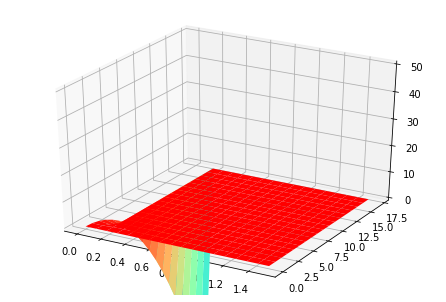

In [12]:
# 定义figure
fig = plt.figure()
# 创建3d图形的两种方式
# 将figure变为3d
ax = Axes3D(fig)
ax.set_zlim(0, 50)
tt=[i for i in t]           # t = np.linspace(0, 1.5, 15)
yy=[i for i in range(0,2*num_elems+2)]  # num_elems=8

TT,YY = np.meshgrid(tt, yy)
ax.plot_surface(TT, YY, Y, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))

In [ ]:
# M1= np.dot(evecs[:,1].T,np.dot(M.np.dot(evecs[:,1]) )  )
# evecs[:,0] #.T #.shape
M1 = np.dot( np.transpose(evecs[:,0]), M.dot(evecs[:,0]) )
K1 = np.dot( np.transpose(evecs[:,0]), K.dot(evecs[:,0]) )
# k2= evals[0]*m1
# k1-k2
F1= np.dot( np.transpose(evecs[:,0]), F )

def diff2(d_list, t):
	d, y = d_list
	return np.array([F1-K1*y, d])
# t = np.linspace(0, 1.5, 15)

result = odeint(diff2, [0, 0], t)
result.shape
# # # 结果是一个两列的矩阵， odeint中第二个是初始条件
# # # plt.plot(t, result[:, 0])  # 输出d随时变化曲线
# plt.plot(t, result[:, 1])  # 输出y随时变化曲线，即方程解
# plt.show()

# delta1=

In [ ]:
# exact_frequency = math.pi**2   #  simply supported
exact_frequency = 1.875104**2  #  cantilever beam
# exact_frequency = 3.926602**2  #  built in - pinned beam
#exact_frequency = 4.730041**2    #  fixed-fixed

errors = []
for i in range(2,20):     # number of elements
	start = time.perf_counter()
	M, K, frequencies, evecs ,evals = beam(i)
	time_taken = time.perf_counter() - start
	error = (frequencies[0] - exact_frequency) / exact_frequency * 100.0
	errors.append( (i, error) )
	print ('Num Elems: {} \tFrequency: {}\tError: {}% \tShape: {} \tTime: {}'
			.format( i, round(frequencies[0],3), round(error, 3), K.shape, round(time_taken*1000, 3) ))

print ('Exact Freq:', round(exact_frequency, 3) )

In [ ]:
element  = np.array([x[0] for x in errors])
error   = np.array([x[1] for x in errors])


# plot the result
plt.plot(element, error, 'o-')
plt.xlim(1, element[-1])
plt.xlabel('Number of Elements')
plt.ylabel('Errror ')
plt.show()